In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
"""
======================
DESCRIPTIVE STATISTICS
======================
Tell me the summary of what happened
"""
data = pd.read_csv("/Users/Sapountzi/anaconda/AnacondaProjects/DataLoanPrediction/train.csv") 

In [5]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
#take a random sample(an alternative to head)
data.sample(n=4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
504,LP002619,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
307,LP001994,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,N


In [7]:
#Loan Amount Missing Values: CoapplicantIncome - LoanAmount = 614-592 = 22
#The mean of credit history shows that 84% applicants have a credit history
#A hint of data skewness is depicted by comparing the mean to the median
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Frequency distribution for non-numerical variables
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

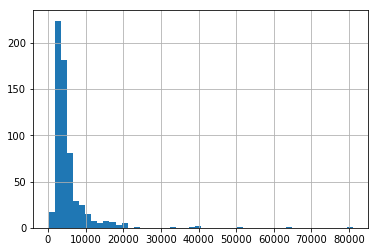

In [10]:
#Distribution analysis of numeric variables ApplicantIncome and LoanAmount
#bins 50 allows the outliers to be shown in the figure
data['ApplicantIncome'].hist(bins=50)

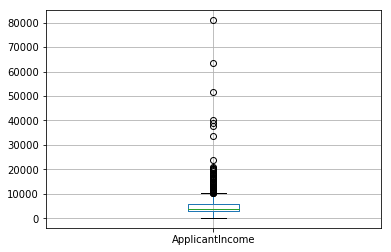

In [11]:
data.boxplot(column = 'ApplicantIncome')
#Why are there so many outliers? Cn it be attributed to the different levels of education?

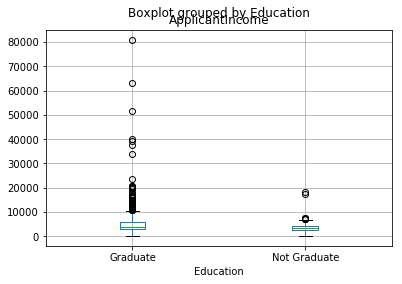

In [12]:
data.boxplot(column='ApplicantIncome', by = 'Education')

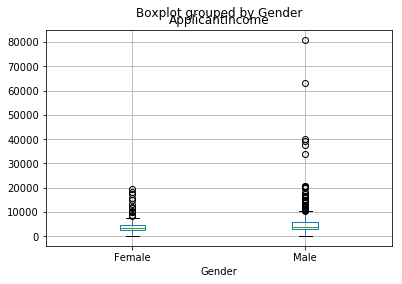

In [13]:
data.boxplot(column='ApplicantIncome', by = 'Gender')

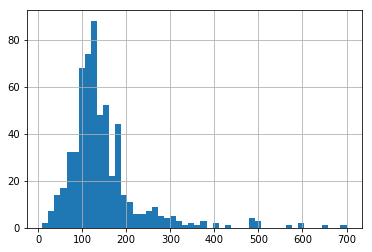

In [14]:
data['LoanAmount'].hist(bins = 50)

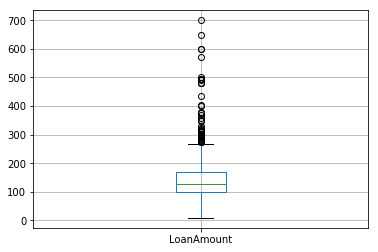

In [15]:
data.boxplot(column = 'LoanAmount')
#There are again extreme values.

In [16]:
#What types of applicants do usually take the loan
data.sort_values(by='Loan_Status', ascending=False)[:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
297,LP001954,Female,Yes,1,Graduate,No,4666,0.0,135.0,360.0,1.0,Urban,Y
311,LP002004,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban,Y
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y
515,LP002659,Male,Yes,3+,Graduate,No,3466,3428.0,150.0,360.0,1.0,Rural,Y
516,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
306,LP001993,Female,No,0,Graduate,No,3762,1666.0,135.0,360.0,1.0,Rural,Y
304,LP001978,Male,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Rural,Y
303,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y


In [17]:
#All females who are not graduate and got a loan
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]


,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [62]:
"""
=========================
Lambda and Apply Functions
=========================
Lambda: a short function without a name that you do not intend to use multiple times
Apply: the opposite of lambda
"""
#divide rows into 2 groups: the applicants who took a loan and those who didn't 
def loan_taken(x):
    return x=='Y'

data['Loan_Status'].apply(loan_taken).sort_values(ascending=False)

##The same with a lambda function
#data['Loan_Status'].apply(lambda x: x=='Y')

613    False
201    False
208    False
207    False
206    False
205    False
204    False
203    False
202    False
200    False
229    False
199    False
198    False
197    False
196    False
195    False
194    False
193    False
209    False
210    False
211    False
212    False
227    False
226    False
225    False
224    False
223    False
222    False
221    False
220    False
       ...  
395    False
394    False
393    False
392    False
391    False
390    False
389    False
388    False
387    False
386    False
401    False
403    False
420    False
404    False
419    False
418    False
417    False
416    False
415    False
414    False
413    False
412    False
411    False
410    False
409    False
408    False
407    False
406    False
405    False
0      False
Name: Loan_Status, dtype: bool

In [19]:
"""
=====================================================
Categorical Values Mapping and Frequency Distribution
=====================================================
"""
#The mean of getting the loan based on credit history
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values = 'Loan_Status', index = ['Credit_History'], aggfunc = lambda x:x.map({'Y':1,'N': 0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nPropability of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Propability of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


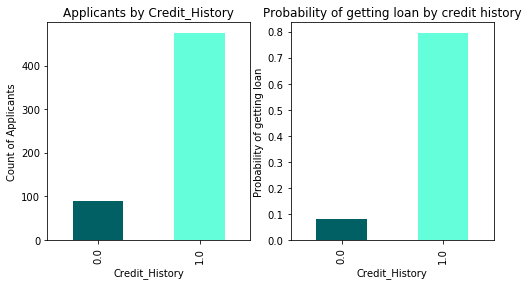

In [20]:
"""Histograms that correlate i.the probability distribution of the features number of applicants by credit history 
with ii.the class of getting a loan
""" 
# Figure contains all the plot elements, figsize controls the width and height
# Subplot controls the space between the subplots
# Add an axes at position rect [left, bottom, width, height] 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar', color = ['#006064', '#64FFDA'])

ax2 = fig.add_subplot(122)
temp2.plot(kind ='bar', color = ['#006064', '#64FFDA'])
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


In [21]:
#The average loan amount by Gender, Employment status, Marriage status
avg_loan = data.pivot_table(values = ['LoanAmount'], index = ['Gender', 'Married', 'Self_Employed'], aggfunc = np.mean)
avg_loan

LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556

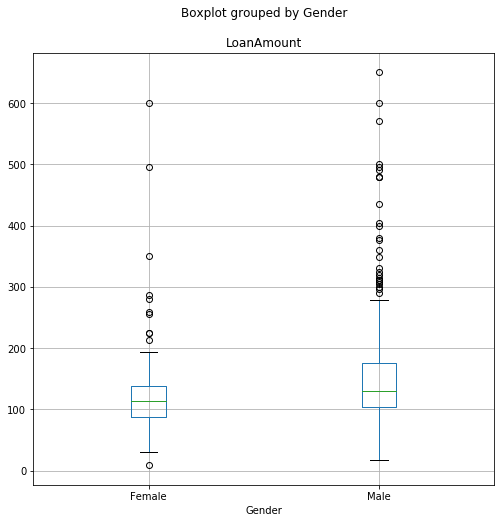

In [22]:
#Side-by side boxplot: takes a numerical var and splits it differently on each level of categorical var
data.boxplot(column = 'LoanAmount', by="Gender", figsize = (8,8))
#There are again extreme values.

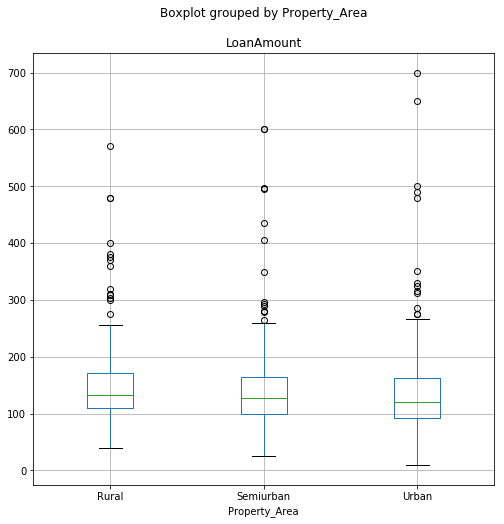

In [23]:
data.boxplot(column = 'LoanAmount', by = 'Property_Area', figsize = (8,8))

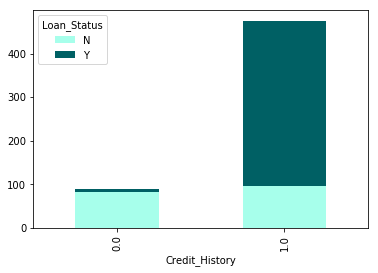

In [24]:
# A graphical classifier correlates the feature of Credit History with the two classes
# Barplots display counts of categorical values.
# Crosstab creates the table of counts that can be used in barplot

temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color = ['#A7FFEB', '#006064'])

In [25]:
"""
==============
Data Wrangling
==============
Cleanse Missing Values & Extreme Values
"""

'\n==============\nData Wrangling\n==============\nCleanse Missing Values & Extreme Values\n'

In [26]:
# Missing Values: apply function or lamda to find the missing values in each row(#axis=1) and column(#axis=0).

"""def num_missing(x):
    return sum(x.isnull())

print "Missing values per column:"
print data.apply(num_missing, axis =0)
"""

data.apply(lambda x: sum(x.isnull()), axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#Fill in missing values of numerical vars with their mean

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=False) #inplace = True won't print the output

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

In [28]:
# Fill in missing values of categorical vars with the value occurs more frequently
# data['Self_Employed'].count() --> outputs 582

data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
#86% are not employed
data['Self_Employed'].fillna('No', inplace = True)

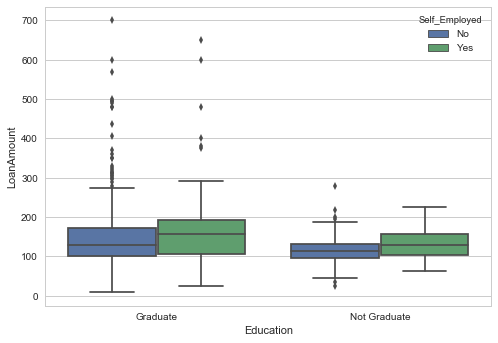

In [30]:
#Test an hypothesis:
#Self-employed and educated take a good loan amount? Firstly, impute missing values for each categorical var

#Is there a trend? Check the median
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.boxplot(x = data["Education"], y =data["LoanAmount"], hue = data["Self_Employed"])

In [31]:
#Give a concrete visualization on median of the above boxplot 
#alternative: data.pivot_table(values='LoanAmount', index= 'Self_Employed', columns = 'Education', aggfunc=np.median)

table = data.pivot_table(values='LoanAmount', index=['Self_Employed','Education'], aggfunc=np.median)
table

Self_Employed  Education   
No             Graduate        130.0
               Not Graduate    113.0
Yes            Graduate        157.5
               Not Graduate    130.0
Name: LoanAmount, dtype: float64

In [32]:
# Define a function to return the values of this pivot_table
table = data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Impute missing values of loan amount based on the median of empolyment and education
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

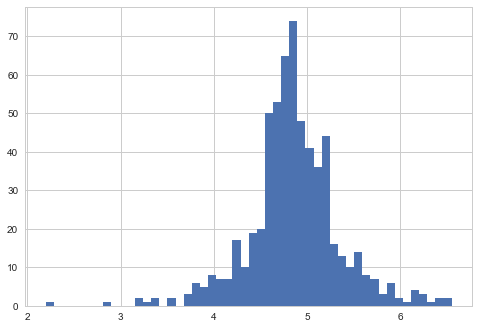

In [33]:
# How to treat Extreme Values of Loan Amount
# Log transformation makes highly skewed distributions less skewed and subsidizes outliers
# After log-transformation, the values are normally distributed. 

data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins = 50)

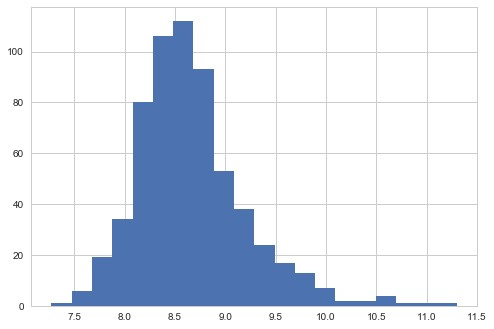

In [34]:
# How to treat Extreme Values of Applicant Income

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Total_Income_Log'] = np.log(data['Total_Income'])
data['Total_Income_Log'].hist(bins = 20)

In [35]:
# Missing values for Gender
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [36]:
data['Gender'].fillna('Male', inplace = True)

In [37]:
# Missing values for Married
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
data['Married'].fillna('Yes', inplace = True)

In [39]:
# Missing values for Dependents
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [40]:
data['Dependents'].fillna('0', inplace = True)

In [41]:
# Missing values for Loan_Amount_Term, Credit_History.
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
# Is there a correlation among loan term and loan amount? 
data.pivot_table(values = 'LoanAmount', index = 'Loan_Amount_Term', aggfunc = np.median)

Loan_Amount_Term
12.0     111.0
36.0     117.5
60.0     140.0
84.0     126.0
120.0     25.0
180.0    120.0
240.0    115.0
300.0    124.0
360.0    130.0
480.0    113.0
Name: LoanAmount, dtype: float64

In [43]:
#If not, impute the missing values with the most frequent value
data['Loan_Amount_Term'].fillna('360.0', inplace = True)

In [44]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [45]:
data['Credit_History'].fillna('1.0', inplace =True)

In [46]:
data.apply(lambda x: sum(x.isnull()), axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
Total_Income_Log     0
dtype: int64

In [47]:
# Encode categorical variables with value between 0 and n_classes-1.

from sklearn.preprocessing import LabelEncoder

var_cat = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le  = LabelEncoder()

for i in var_cat:
    data[i] = le.fit_transform(data[i])
    
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
Total_Income         float64
Total_Income_Log     float64
dtype: object

In [49]:
"""
================
Predicting Loans
================
A classifier: correlates features of data with class properties
All supervised estimators implement a fit(X, y) method to fit the model 
and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.
"""
# Train three supervised classification models and check which has the highest accuracy based on KFold
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, dataset, x, y):
    #Fit the model according to the given training data.
    model.fit(dataset[x], dataset[y])
    
    #Predict class labels for samples in X array-like matrix
    predictions = model.predict(dataset[x])
    
    #Accuracy classification score
    accuracy = metrics.accuracy_score(predictions, dataset[y])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)

    #Split your entire dataset into 5 folds
    kf = KFold(dataset.shape[0], n_folds=5)
    error = []
    
    #Iterate on training and testing process: 
    for train, test in kf:
        #Filter Training Predictors and Labels:
        train_predictors = (dataset[x].iloc[train,:])
        train_target = (dataset[y].iloc[train])
    
        
        #Training the algorithm using the predictors x and target y. 
        model.fit(train_predictors,train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(data[x].iloc[test,:], dataset[y].iloc[test]))

    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

    #We should change the train and test data set distribution, so that it can be refered outside the function:
    model.fit(dataset[x],dataset[y]) 

/Users/Sapountzi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
#LogisticRegression with CreditHistory as predictor since it is dominating the mode
outcome = 'Loan_Status'
model = LogisticRegression()
predictor =['Credit_History']
classification_model(model, data, predictor, outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [51]:
#A different combination of variables:
predictor = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, data, predictor,outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [52]:
# To achieve better accuracy, we use another model technique
# Though, amore effective option is Feature Engineering
# Decision Tree

model = DecisionTreeClassifier()
predictor = ['Credit_History','Gender','Married','Education']
outcome = 'Loan_Status'
classification_model(model, data, predictor, outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [53]:
# Different combination of variables
predictor = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, data, predictor, outcome)

Accuracy : 88.925%
Cross-Validation Score : 69.046%


In [54]:
# Accuracy increased and cross validation decreased-> Overfitting: Try more sophisticated model
# Accuracy 100% -> The ultimate case of Overfitting: Reduce features or Tune parameters

In [55]:
# Ensemble Decision Trees: Random Forests
model = RandomForestClassifier(n_estimators =100)
predictors = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','Total_Income_Log']
classification_model(model, data, predictors, outcome)

Accuracy : 100.000%
Cross-Validation Score : 77.201%


In [64]:
# What features affect your model and to what degree
# Feature Selection via Random Forest

importances = pd.Series(model.feature_importances_, index = predictors).sort_values(ascending = False)
importances

Credit_History      0.569907
Total_Income_Log    0.192748
LoanAmount_log      0.159030
Property_Area       0.042507
Dependents          0.035808
dtype: float64

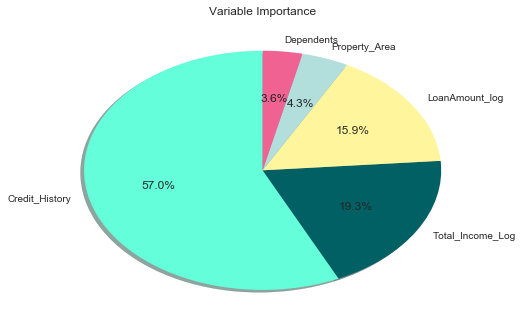

In [65]:
# Top 5 Variable Importance

slices = [importances[0], importances[1], importances[2], importances[3], importances[4]]
activities = [importances.index[0], importances.index[1], importances.index[2], importances.index[3], importances.index[4]]
cols = ['#64FFDA', '#006064', '#FFF59D', '#B2DFDB', '#F06292']

plt.pie(slices, 
        labels = activities,
        colors = cols,
        startangle = 90, #the first division vertically ligned
        shadow = True,
        autopct = '%1.1f%%') #show percentages

plt.title('Variable Importance')

In [58]:
# Use the top 5 features and modify the parameters of the model a little
model = RandomForestClassifier(n_estimators=25, min_samples_split= 25, max_depth=7, max_features=1)
predictors = ['Total_Income_Log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, data, predictors, outcome)

Accuracy : 82.410%
Cross-Validation Score : 81.273%


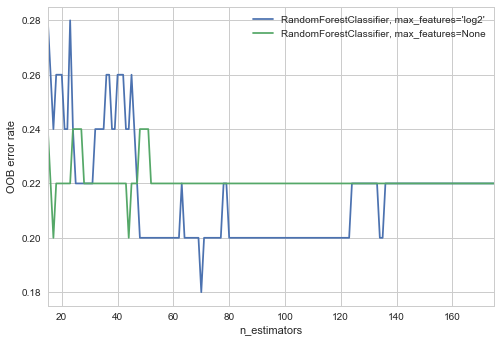

In [78]:
""" Out Of Bag (OOB) Error to estimate the prediction of random forests.
The OOB error estimate removes the need for a set aside test set.
"""
from collections import OrderedDict
from sklearn.datasets import make_classification

RANDOM_STATE = 123

# Generate a binary classification dataset.
 
predictors, outcome = make_classification(n_samples= 50, n_classes=2, n_features=12, n_clusters_per_class=1, n_informative=5, random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(predictors,outcome )

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
""" Add trees

n_estimators = 100
forest = RandomForestClassifier(warm_start=True, oob_score=True)

for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(X, y)
    print i, forest.oob_score_  
    """